<a href="https://colab.research.google.com/github/HugoVenegas23/P2_RandomWalks/blob/main/P2_RandomWalksII_HEGV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#P2 Random Walks II
**Nombre**: Hugo Esteba González Venegas

**e-mail**: hugo.gonzalez0181@alumnos.udg.mx

##Modulos


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

##Clases

In [ ]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen
* Visualizar con **plotly**

* Parametros m = 3.0, Levy_exponent = x, beta = 0

In [55]:
#Valores iniciales
res=200
aux=np.linspace(-np.pi, np.pi, res)

#Exponenciales para la distribución de Lévy
levye=[0.4, 0.2, 0.54, 0.94,0.5]

fig_levy_stable_pdf = go.Figure()

for exponentes in levye:
    levy_stable_pdf = np.array([levy_stable.pdf(i, exponentes, 0) for i in aux])
    fig_levy_stable_pdf.add_trace(go.Scatter(
      x = aux,
      y = levy_stable_pdf,
      marker = dict(size=3),
      line = dict(width=3),
      mode = 'lines',
      name =f'levy_{exponentes}'
    ))

fig_levy_stable_pdf.update_layout(title_text='Levy_Stable')
fig_levy_stable_pdf.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF
* Visualizar con **matplotlib**

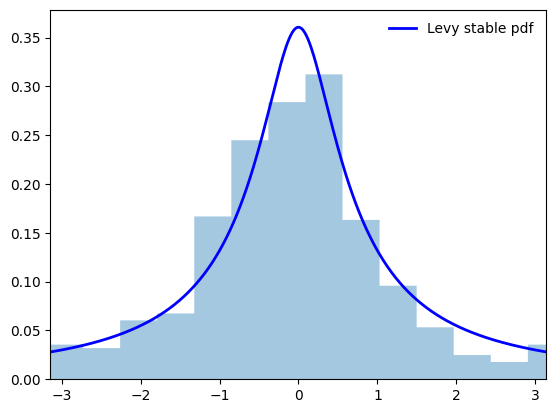

In [50]:
#Valores iniciales
res=600
levye=0.8
beta=0
aux=np.linspace(-np.pi, np.pi,res)

#figura
fig_levy2=plt.figure()
xe = fig_levy2.add_subplot(111)
levy_stable_pdf = np.array([levy_stable.pdf(i, levye, beta) for i in aux])

levy_stable_data = levy_stable.rvs(levye,beta,size=res)
xe.set_xlim(aux[0],aux[-1])

xe.plot(aux,levy_stable_pdf,'b-',lw=2,label='Levy stable pdf')
xe.hist(levy_stable_data,density=True,bins='auto',histtype='stepfilled',alpha=0.4)
xe.legend(loc='best',frameon=False)

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**

In [70]:
#Valores iniciales
steps=10000
cauchy=.4
levy_exp=1
beta=0
std_steps=3
speed=6
l=1

#Pandas
vec= Vec2d(speed,0)
BM_3d_df = pd.DataFrame(columns=["x_pos","y_pos"])
temp_df=pd.DataFrame([{"x_pos":0,"y_pos":0}])
BM_3d_df= pd.concat([BM_3d_df,temp_df],ignore_index=True)

#Cambio de ángulo
while(l<steps):
  angulo= wrapcauchy.rvs(c=cauchy)
  vec= vec.rotated(angulo)

  #floor trunca el entero
  step= abs(math.floor(levy_stable.rvs(alpha=levy_exp, beta=beta ,loc=std_steps)))
  if(l+step>steps):
    step=steps-l

  c_step = 0
  while(c_step<step):
    temp_df = pd.DataFrame([{"x_pos":BM_3d_df.x_pos[l-1]+vec.x,"y_pos":BM_3d_df.y_pos[l-1]+vec.y}])
    BM_3d_df = pd.concat([BM_3d_df,temp_df],ignore_index=True)
    c_step = c_step + 1
    l = l+1

#Figura
gr=np.linspace(0,1,steps)

fig_3 = go.Figure()
aux_zdomain = np.linspace(0,1, steps)

fig_3 = go.Figure(data=go.Scatter3d(
    x=BM_3d_df.x_pos,
    y=BM_3d_df.y_pos,
    z=aux_zdomain,
    line=dict(color='green',width=3),
    name='Trayectoria',
    showlegend = True,
    mode="lines",
))
fig_3.show()

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable n_traj
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente
* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**
* Exportar trayectorias como *pkl*

In [71]:
#Valores iniciales
steps=1000
cauchy=.4
levy_exp=1
beta=0
std_steps=3
n_traj=10
speed=6

#Pandas
save_trajectories = pd.DataFrame(columns=["Trajectories"])
tempo_df=pd.DataFrame([{"Trajectories":[]}])
t=np.linspace(0,1,steps)